In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
import pickle

In [0]:
from keras import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from keras.applications import vgg16
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input as vgg_pi
from keras.applications.resnet50 import preprocess_input as resnet_pi
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
import keras
from keras.models import load_model

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
with open('/content/drive/My Drive/Colab Notebooks/domat/history/vgg_untrained.pickle', 'rb') as handle:
    history_vgg_untrained = pickle.load(handle)
    
with open('/content/drive/My Drive/Colab Notebooks/domat/history/vgg_imagenet.pickle', 'rb') as handle:
    history_vgg_imagenet = pickle.load(handle)

with open('/content/drive/My Drive/Colab Notebooks/domat/history/vgg_imagenet_l2.pickle', 'rb') as handle:
    history_vgg_imagenet_l2 = pickle.load(handle)

with open('/content/drive/My Drive/Colab Notebooks/domat/history/vgg_imagenet_dropout.pickle', 'rb') as handle:
    history_vgg_imagenet_dropout = pickle.load(handle)

    
with open('/content/drive/My Drive/Colab Notebooks/domat/history/resnet_untrained.pickle', 'rb') as handle:
    history_resnet_untrained = pickle.load(handle)
    
with open('/content/drive/My Drive/Colab Notebooks/domat/history/resnet_imagenet.pickle', 'rb') as handle:
    history_resnet_imagenet = pickle.load(handle)

with open('/content/drive/My Drive/Colab Notebooks/domat/history/resnet_imagenet_l2.pickle', 'rb') as handle:
    history_resnet_imagenet_l2 = pickle.load(handle)

with open('/content/drive/My Drive/Colab Notebooks/domat/history/resnet_imagenet_dropout.pickle', 'rb') as handle:
    history_resnet_imagenet_dropout = pickle.load(handle)

W0619 07:45:30.534261 139744346982272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 07:45:31.074227 139744346982272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 07:45:31.118869 139744346982272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0619 07:45:31.342471 139744346982272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0619 07:45:31.343808 139744346982272 deprecation_

In [0]:
model_vgg_untrained = load_model('/content/drive/My Drive/Colab Notebooks/domat/models/vgg_untrained.h5')

model_vgg_imagenet = load_model('/content/drive/My Drive/Colab Notebooks/domat/models/vgg_imagenet.h5')

model_vgg_imagenet_l2 = load_model('/content/drive/My Drive/Colab Notebooks/domat/models/vgg_imagenet_l2.h5')

model_vgg_imagenet_dropout = load_model('/content/drive/My Drive/Colab Notebooks/domat/models/vgg_imagenet_dropout.h5')


model_resnet_untrained = load_model('/content/drive/My Drive/Colab Notebooks/domat/models/resnet_untrained.h5')

model_resnet_imagenet = load_model('/content/drive/My Drive/Colab Notebooks/domat/models/resnet_imagenet.h5')

model_resnet_imagenet_l2 = load_model('/content/drive/My Drive/Colab Notebooks/domat/models/resnet_imagenet_l2.h5')

model_resnet_imagenet_dropout = load_model('/content/drive/My Drive/Colab Notebooks/domat/models/resnet_imagenet_dropout.h5')

In [0]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/domat/solo-dataset/test/',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
)

Found 3637 images belonging to 10 classes.


In [0]:
# check if GPU is running
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
print('Metrics: ')
model_vgg_untrained.metrics_names

Metrics: 


['loss', 'acc']

In [0]:
steps = 3637 // 32

In [0]:
loss_vgg_untrained, accuracy_vgg_untrained = model_vgg_untrained.evaluate_generator(test_generator,
                                             steps = steps,
                                             workers = 4,
                                             use_multiprocessing=True)

loss_vgg_imagenet, accuracy_vgg_imagenet = model_vgg_imagenet.evaluate_generator(test_generator,
                                             steps = steps,
                                             workers = 4,
                                             use_multiprocessing=True)

loss_vgg_imagenet_l2, accuracy_vgg_imagenet_l2 = model_vgg_imagenet_l2.evaluate_generator(test_generator,
                                             steps = steps,
                                             workers = 4,
                                             use_multiprocessing=True)

loss_vgg_imagenet_dropout, accuracy_vgg_imagenet_dropout = model_vgg_imagenet_dropout.evaluate_generator(test_generator,
                                             steps = steps,
                                             workers = 4,
                                             use_multiprocessing=True)

/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:293: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


In [0]:
loss_resnet_untrained, accuracy_resnet_untrained = model_resnet_untrained.evaluate_generator(test_generator,
                                             steps = steps,
                                             workers = 4,
                                             use_multiprocessing=True)

loss_resnet_imagenet, accuracy_resnet_imagenet = model_resnet_imagenet.evaluate_generator(test_generator,
                                             steps = steps,
                                             workers = 4,
                                             use_multiprocessing=True)

loss_resnet_imagenet_l2, accuracy_resnet_imagenet_l2 = model_resnet_imagenet_l2.evaluate_generator(test_generator,
                                             steps = steps,
                                             workers = 4,
                                             use_multiprocessing=True)

loss_resnet_imagenet_dropout, accuracy_resnet_imagenet_dropout = model_resnet_imagenet_dropout.evaluate_generator(test_generator,
                                             steps = steps,
                                             workers = 4,
                                             use_multiprocessing=True)

/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:293: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


In [0]:
data = {'VGG': [accuracy_vgg_untrained, accuracy_vgg_imagenet, accuracy_vgg_imagenet_l2, accuracy_vgg_imagenet_dropout], 
       'ResNet': [accuracy_resnet_untrained, accuracy_resnet_imagenet, accuracy_resnet_imagenet_l2, accuracy_resnet_imagenet_dropout]}

df = pd.DataFrame.from_dict(data, orient='index', columns=['Untrained base',
                              'Pretrained base', 'Pretrained base (l2)',
                              'Pretrained base (dropout)'])

In [0]:
df.head()

,Untrained base,Pretrained base,Pretrained base (l2),Pretrained base (dropout)
VGG,0.310841,0.886615,0.772400,0.866980
ResNet,0.548119,0.019358,0.310841,0.310841


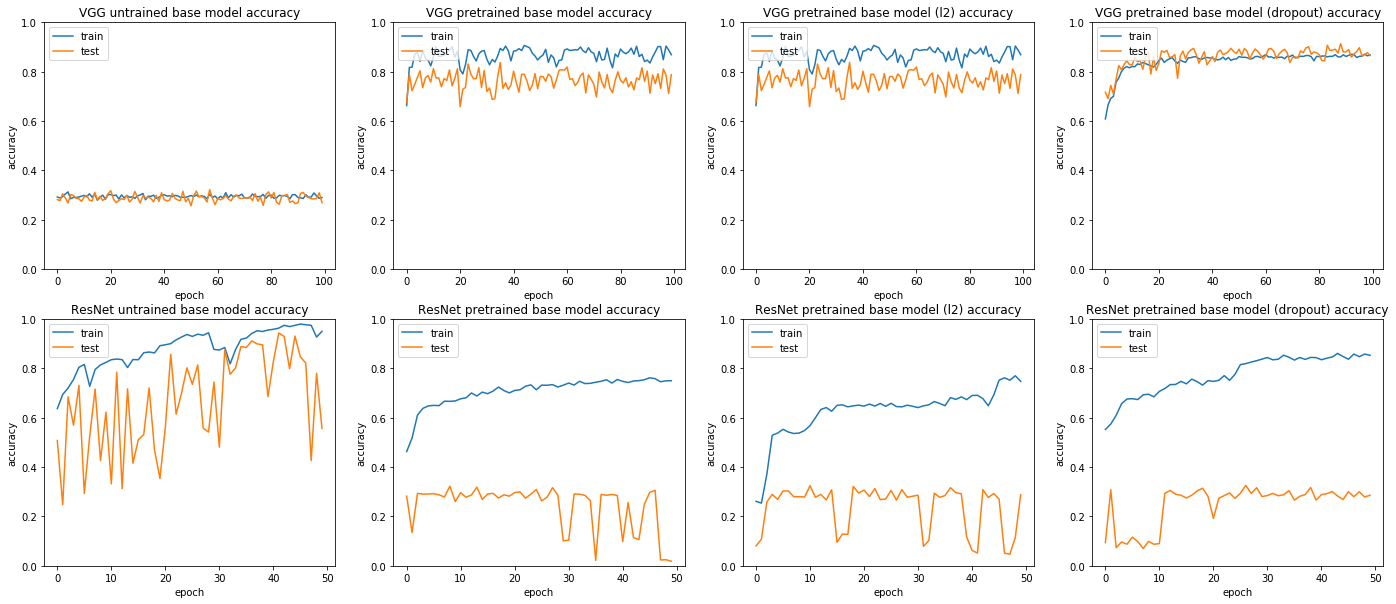

In [0]:
fig = plt.figure(figsize=(30, 10))

plt.subplot(2, 4, 1)
axes = plt.gca()
axes.set_ylim([0, 1])
plt.plot(history_vgg_untrained.history['acc'])
plt.plot(history_vgg_untrained.history['val_acc'])
plt.title('VGG untrained base model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 4, 2)
axes = plt.gca()
axes.set_ylim([0, 1])
plt.plot(history_vgg_imagenet.history['acc'])
plt.plot(history_vgg_imagenet.history['val_acc'])
plt.title('VGG pretrained base model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 4, 3)
axes = plt.gca()
axes.set_ylim([0, 1])
plt.plot(history_vgg_imagenet_l2.history['acc'])
plt.plot(history_vgg_imagenet_l2.history['val_acc'])
plt.title('VGG pretrained base model (l2) accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 4, 4)
axes = plt.gca()
axes.set_ylim([0, 1])
plt.plot(history_vgg_imagenet_dropout.history['acc'])
plt.plot(history_vgg_imagenet_dropout.history['val_acc'])
plt.title('VGG pretrained base model (dropout) accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(2, 4, 5)
axes = plt.gca()
axes.set_ylim([0, 1])
plt.plot(history_resnet_untrained.history['acc'])
plt.plot(history_resnet_untrained.history['val_acc'])
plt.title('ResNet untrained base model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 4, 6)
axes = plt.gca()
axes.set_ylim([0, 1])
plt.plot(history_resnet_imagenet.history['acc'])
plt.plot(history_resnet_imagenet.history['val_acc'])
plt.title('ResNet pretrained base model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 4, 7)
axes = plt.gca()
axes.set_ylim([0, 1])
plt.plot(history_resnet_imagenet_l2.history['acc'])
plt.plot(history_resnet_imagenet_l2.history['val_acc'])
plt.title('ResNet pretrained base model (l2) accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 4, 8)
axes = plt.gca()
axes.set_ylim([0, 1])
plt.plot(history_resnet_imagenet_dropout.history['acc'])
plt.plot(history_resnet_imagenet_dropout.history['val_acc'])
plt.title('ResNet pretrained base model (dropout) accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')



plt.show()